In [1]:
library('tidyverse')
theme_set(theme_gray(base_size = 22))
options(repr.plot.width=8, repr.plot.height=6)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Boxplots

In [2]:
otter.data = read.csv('https://jcoliver.github.io/learn-r/data/otter-mandible-data.csv') %>%
     gather(characteristic, value, -species, -museum, -accession)

otter.data %>% head

,species,museum,accession,characteristic,value
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,A. cinerea,AMNH,101458,m1,15.100
2,A. cinerea,AMNH,101461,m1,12.740
3,A. cinerea,AMNH,101466,m1,12.425
4,A. cinerea,AMNH,101635,m1,13.400
5,A. cinerea,AMNH,101459,m1,14.400
6,A. cinerea,AMNH,101462,m1,14.525


In [3]:
df.m1 = otter.data %>% filter(characteristic == 'm1') %>% drop_na()
 df.m1 %>% head

,species,museum,accession,characteristic,value
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,A. cinerea,AMNH,101458,m1,15.100
2,A. cinerea,AMNH,101461,m1,12.740
3,A. cinerea,AMNH,101466,m1,12.425
4,A. cinerea,AMNH,101635,m1,13.400
5,A. cinerea,AMNH,101459,m1,14.400
6,A. cinerea,AMNH,101462,m1,14.525


Make a boxplot with species on the x-axis and value on the y-axis where value represents the m1 characteristic.

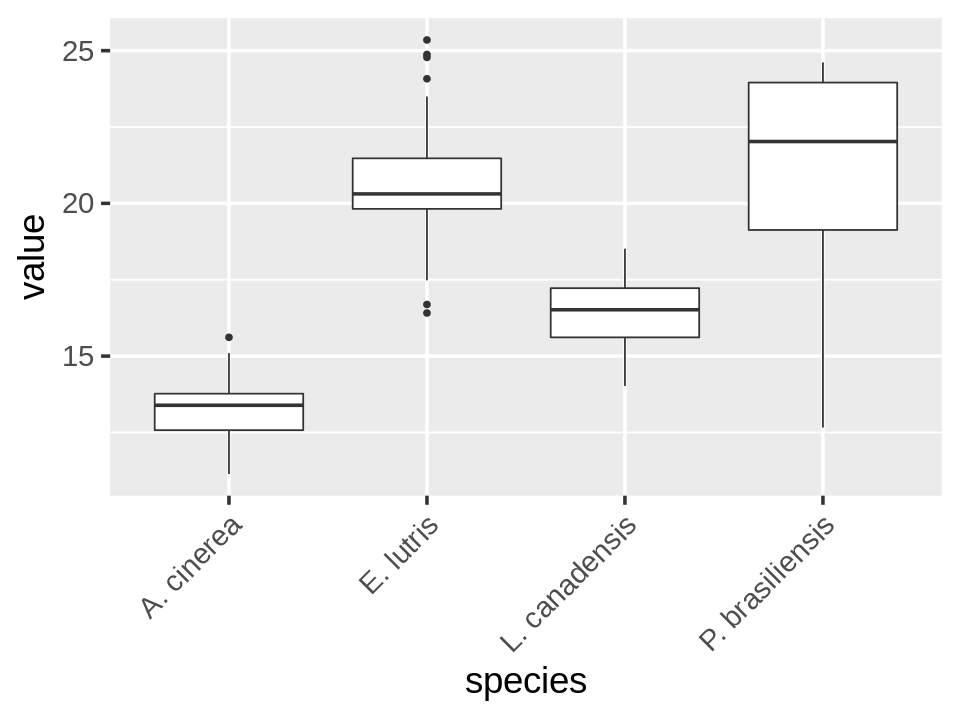

In [6]:
p= ggplot(df.m1, aes(x=species, y=value))
p=p+geom_boxplot()+theme(axis.text.x = element_text(angle = 45, hjust = 1))
p

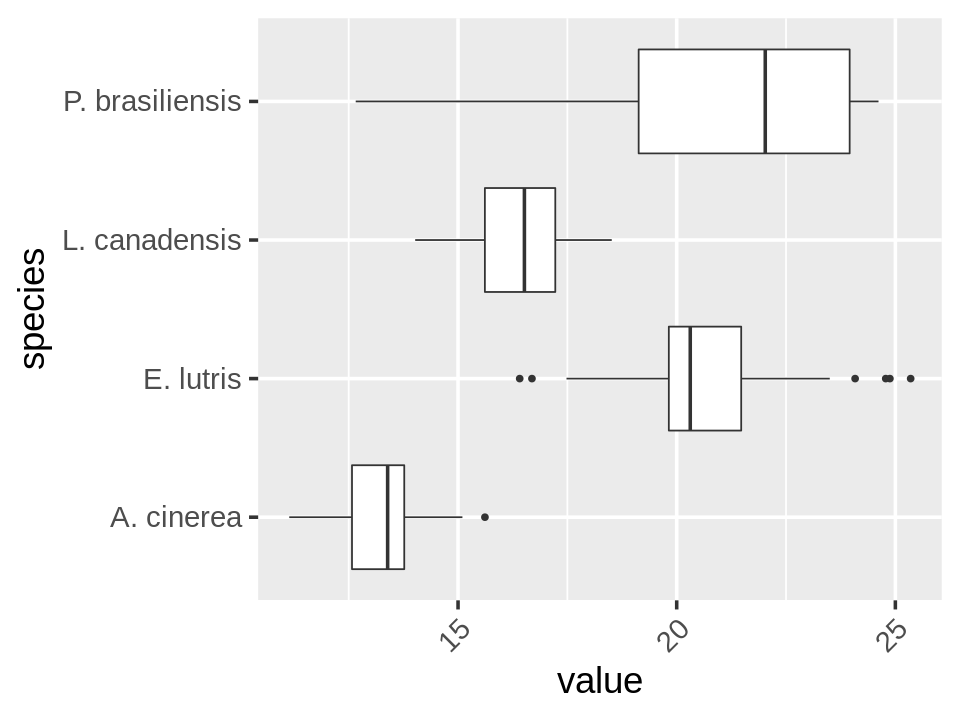

In [8]:
p=p+coord_flip()
p

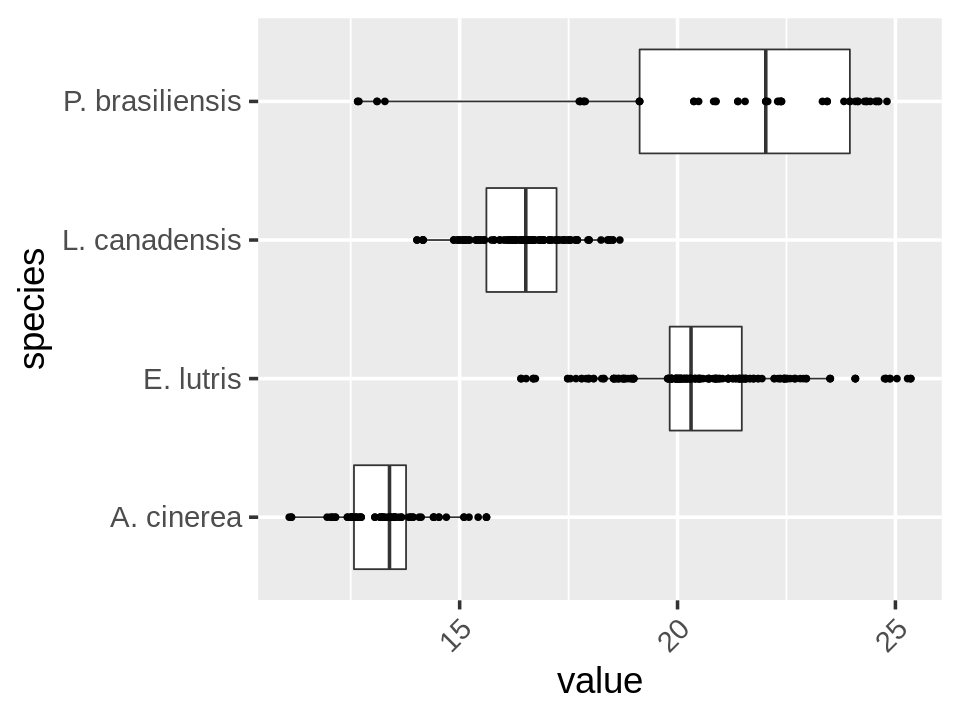

In [13]:
p=p+geom_point(position=position_jitter(h=.2,w=0))
p

## Histograms and KDE
Preview the diamonds data set:

In [9]:
diamonds%>%head

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


Here is the diamonds set filtered to diamonds with clarity values of I1 and IF.

In [14]:
df = diamonds %>% filter(clarity %in% c('I1', 'IF'))

df %>% head

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.32,Premium,E,I1,60.9,58,345,4.38,4.42,2.68
1.17,Very Good,J,I1,60.2,61,2774,6.83,6.90,4.13
1.01,Premium,F,I1,61.8,60,2781,6.39,6.36,3.94
0.52,Ideal,F,IF,62.2,55,2783,5.14,5.18,3.21
1.01,Fair,E,I1,64.5,58,2788,6.29,6.21,4.03
0.55,Ideal,G,IF,60.9,57,2789,5.28,5.30,3.22


Using facet_wrap, plot a histogram of price where each plot panel represents one clarity value (i.e. I1 or IF).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



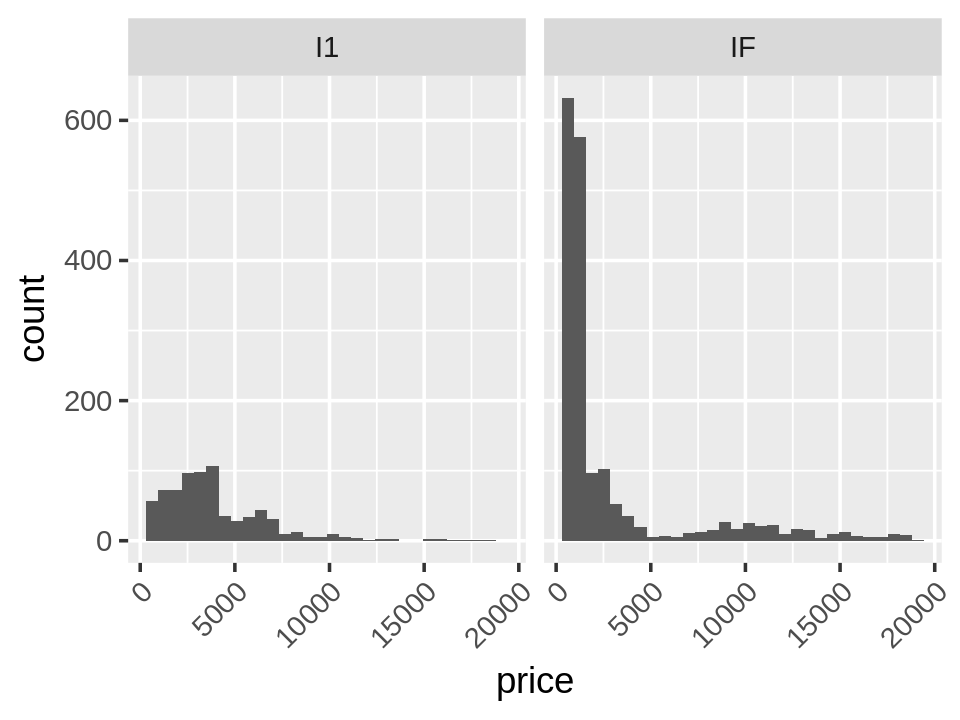

In [16]:
q=ggplot(df, aes(x=price))
q=q+geom_histogram()
q=q+facet_wrap(~clarity)
q=q+theme(axis.text.x = element_text(angle = 45, hjust = 1))
q

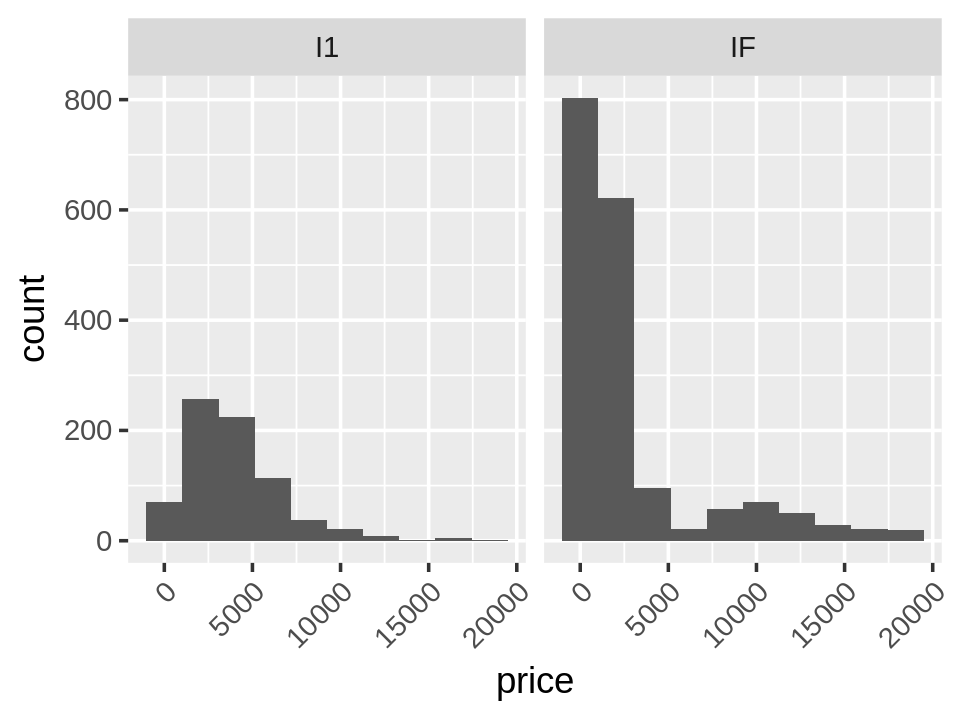

In [25]:
t=ggplot(df, aes(x=price))
t=t+geom_histogram(bins = 10)
t=t+facet_wrap(~clarity)
t=t+theme(axis.text.x = element_text(angle = 45, hjust = 1))
t

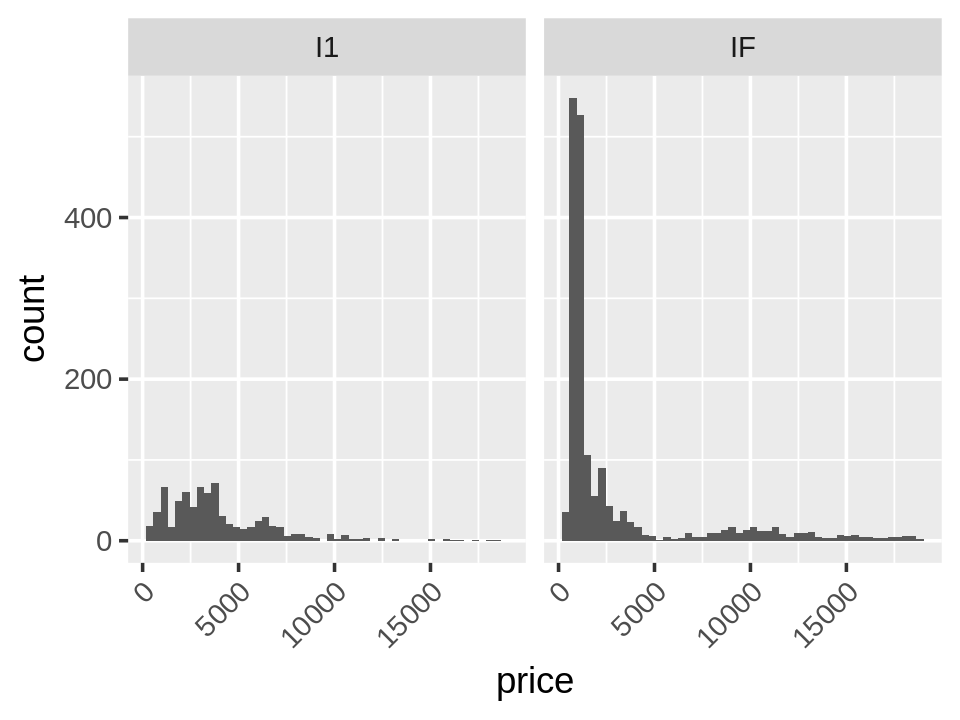

In [26]:
t.2=ggplot(df, aes(x=price))
t.2=t.2+geom_histogram(bins = 50)
t.2=t.2+facet_wrap(~clarity)
t.2=t.2+theme(axis.text.x = element_text(angle = 45, hjust = 1))
t.2

Do the same with the KDE geom.

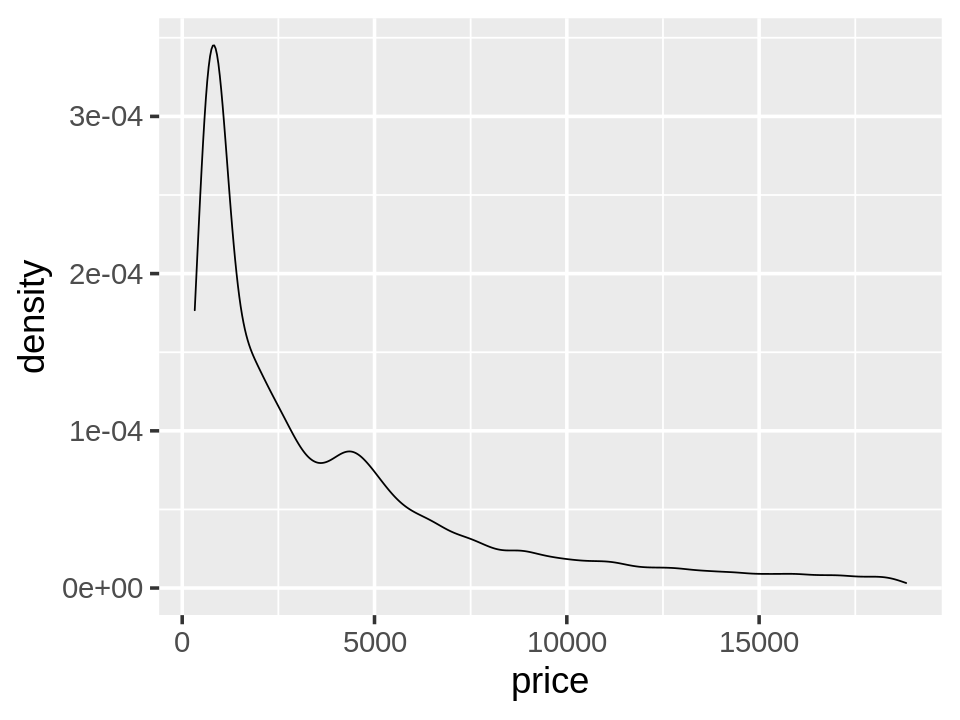

In [27]:
z=ggplot(diamonds, aes(x=price))
z=z+ geom_density()
z